# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.pipeline import Pipeline

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(filename, header = 0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df.head()
df.describe()

,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


As seen by the difference in the value for count and unique, there are duplicate examples in this dataset. However, the duplicates serve as a means to balance the classes because there would be a much larger class imbalance without them. This dataset already included these duplicate examples to serve this purpose, therefore I will not remove the duplicates. 

In [5]:
# Check for class imbalance
df['Positive Review'].value_counts()

False    993
True     980
Name: Positive Review, dtype: int64

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### Create Labeled Examples

In [6]:
# YOUR CODE HERE
y = df['Positive Review']
X = df['Review']

X.shape

(1973,)

In [7]:
X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

### Split Labeled Examples into Training and Test Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75, random_state = 1234)

### Implement TF-IDF Vectorizer to Transform Text

In [9]:
# 1. Create a TfidfVectorizer oject
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Print the first 50 items in the vocabulary
print("Vocabulary size {0}: ".format(len(tfidf_vectorizer.vocabulary_)))
print(str(list(tfidf_vectorizer.vocabulary_.items())[0:50])+'\n')

# 4. Transform both the training and test data using the fitted vectorizer and its 'transform' attribute
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Vocabulary size 18558: 
[('there', 16673), ('is', 9043), ('reason', 13533), ('this', 16714), ('book', 2189), ('has', 7803), ('sold', 15423), ('over', 11793), ('180', 73), ('000', 1), ('copies', 3867), ('it', 9076), ('gets', 7240), ('right', 14207), ('to', 16835), ('the', 16627), ('point', 12568), ('accompanies', 444), ('each', 5372), ('strategy', 15943), ('with', 18277), ('visual', 17844), ('aid', 750), ('so', 15386), ('you', 18497), ('can', 2604), ('get', 7239), ('mental', 10534), ('picture', 12402), ('in', 8491), ('your', 18501), ('head', 7844), ('further', 7051), ('its', 9088), ('section', 14743), ('on', 11601), ('analyzing', 974), ('stocks', 15886), ('and', 984), ('commentary', 3384), ('state', 15782), ('of', 11543), ('financial', 6568), ('statements', 15786), ('market', 10286), ('are', 1220), ('money', 10863), ('if', 8336), ('just', 9282), ('starting', 15774)]



### Fit a Logistic Regression Model to the Transformed Training Data and Evaluate the Model

In [10]:
# 1. Create the LogisticRegression model object
model = LogisticRegression(max_iter = 200)

# 2. Fit the model to the transformed training data
model.fit(X_train_tfidf, y_train)

# 3. Use the predict_proba() method to make predictions on the test data
probability_predictions = model.predict_proba(X_test_tfidf)[:, 1]

# 4. Make predictions on the transformed test data using the predict() method
class_label_predictions = model.predict(X_test_tfidf)

# 5. Compute the area under the ROC curve for the test data.
auc_score = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc_score))

# 6. Compute the size of the resulting feature space
len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

AUC on the test data: 0.9146
The size of the feature space: 18558


### Check to See if Model Predicts Properly Using 2 Examples

In [11]:
print('Review #1:\n')
print(X_test.to_numpy()[108])

print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions[108]))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[108]))

Review #1:

Many words - few practical tips! This book did not give much more (-valuable-) information than I already had found out by reading the manual delivered with my pocket computer. 
After reading the book I still had to search for web communities, where some of my questions could be answered. 
My expectations when buying the book were mainly focused on the need for practical hints concerning how to manage tasks, contacts and appointments. Unfortunately, in my view, these important and basic issues were treated too superficially.    


Prediction: Is this a good review? True

Actual: Is this a good review? False



In [12]:
print('Review #2:\n')
print(X_test.to_numpy()[342])

print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions[342]))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[342]))

Review #2:

This book teaches poetic technique clearly while remaining friendly and encouraging.  My second-semester poetry creative writing students use this book as a text together with Michael J. Bugeja's ART AND CRAFT OF POETRY


Prediction: Is this a good review? True

Actual: Is this a good review? True



One of the reviews was predicted correctly, and the other was wrongly predicted.

### Experiment with Different Document Frequency Values and Analyze the Results

In [13]:
for min_df in [1,10,100,1000]:

    print('\nMin Document Frequency Value: {0}'.format(min_df))

    # 1. Create a TfidfVectorizer object
    tfidf_vectorizer = TfidfVectorizer(min_df = min_df, ngram_range = (1,2))

    # 2. Fit the vectorizer to X_train
    tfidf_vectorizer.fit(X_train)

    # 3. Transform the training and test data
    X_train_tfidf = tfidf_vectorizer.transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # 4. Create a LogisticRegression model object, and fit a Logistic Regression model to the transformed training data
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_tfidf, y_train)

    # 5. Make predictions on the transformed test data using the predict_proba() method and save the values of the second column
    probability_predictions = model.predict_proba(X_test_tfidf)[:, 1]

    # 6. Compute the Area Under the ROC curve (AUC) for the test data.
    auc_score = roc_auc_score(y_test, probability_predictions)
    print('AUC on the test data: {:.4f}'.format(auc_score))

    # 7. Compute the size of the resulting feature space using the 'vocabulary_' attribute of the vectorizer
    len_feature_space = len(tfidf_vectorizer.vocabulary_)
    print('The size of the feature space: {0}'.format(len_feature_space))


Min Document Frequency Value: 1
AUC on the test data: 0.9268
The size of the feature space: 138486

Min Document Frequency Value: 10
AUC on the test data: 0.9195
The size of the feature space: 4023

Min Document Frequency Value: 100
AUC on the test data: 0.8463
The size of the feature space: 257

Min Document Frequency Value: 1000
AUC on the test data: 0.6435
The size of the feature space: 9


### Create a TF-IDF and Logistic Regression Pipeline

In [14]:
print('Begin ML pipeline...')

# 1. Define the list of steps:
s = [
        ("vectorizer", TfidfVectorizer(ngram_range = (1, 2), min_df = 10)),
        ("model", LogisticRegression(max_iter = 200))
    ]

# 2. Define the pipeline:
model_pipeline = Pipeline(steps = s)

# 3. Fit the pipeline to the training data
model_pipeline.fit(X_train, y_train)

# 4. Make predictions on the test data
probability_predictions = model_pipeline.predict_proba(X_test)[:, 1]
print('End pipeline')

Begin ML pipeline...
End pipeline


In [15]:
# Evaluate the performance by computing the AUC
auc_score = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc_score))

AUC on the test data: 0.9195


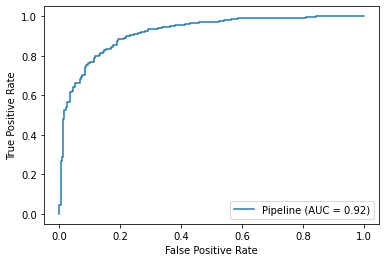

In [16]:
# Plot the results
plot_roc_curve(model_pipeline, X_test, y_test)

### Create Parameter Grid with Hyperparameters to Tune

In [17]:
param_grid = {"model__C": [0.1, 1, 10],
              "model__max_iter": [100, 200, 300, 500, 1000],
              "vectorizer__ngram_range": [(1, 1), (1, 2)],
              "vectorizer__min_df": [1, 5, 10, 50, 100, 1000]
              }

param_grid

{'model__C': [0.1, 1, 10],
 'model__max_iter': [100, 200, 300, 500, 1000],
 'vectorizer__min_df': [1, 5, 10, 50, 100, 1000],
 'vectorizer__ngram_range': [(1, 1), (1, 2)]}

### Run GridSearchCV to Find the Best Hyperparameter Values

In [18]:
print('Running Grid Search...')

# 1. Run a Grid Search with 3-fold cross-validation
grid = GridSearchCV(model_pipeline, param_grid, cv = 3, scoring = 'roc_auc', verbose = 2)

# 2. Fit the model on the training data
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 1), total=   0.4s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 1), total=   0.6s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 1), total=   0.4s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 2), total=   1.6s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 2), total=   1.6s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1, vectorizer__ngram_range=(1, 2), total=   1.7s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=5, vectorizer__ngram

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.5s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=0.1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=0.1, model__max_iter=200, vectorizer__

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=0.1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=0.1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=0.1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=0.1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=0.1, model__max_iter=300, vectorizer__

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=0.1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=0.1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=0.1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=0.1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.5s
[CV] model__C=0.1, model__max_iter=500, vectorizer__

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=0.1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=0.1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.5s
[CV] model__C=0.1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=0.1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=0.1, model__max_iter=1000, vectorizer_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=0.1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=0.1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.3s
[CV] model__C=0.1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=0.1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.8s
[CV] model__C=0.1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=0.1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=0.1, model__max_iter=1000, ve

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=1, model__max_iter=200, vectorizer__min_df=1, vectorizer

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=1, model__max_iter=300, vectorizer__min_df=1, vectorizer

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.5s
[CV] model__C=1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=1, model__max_iter=500, vectorizer__min_df=1, vectorizer

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.5s
[CV] model__C=1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.5s
[CV] model__C=1, model__max_iter=1000, vectorizer__min_df=1, vectorize

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=1, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=10, model__max_iter=100, vectorizer__min_df=1, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=10, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=10, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=10, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.8s
[CV] model__C=10, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=100, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=10, model__max_iter=200, vectorizer__min_df=1, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=10, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=10, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=10, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=10, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=200, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=10, model__max_iter=300, vectorizer__min_df=1, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=10, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=10, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=10, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=10, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=300, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=10, model__max_iter=300, vectorizer__min_df=100

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=10, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=10, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=10, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.8s
[CV] model__C=10, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=500, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.8s
[CV] model__C=10, model__max_iter=1000, vectorizer__min_df=1,

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_df corresponds to < documents than min_df

  FitFailedWarning)


[CV]  model__C=10, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1) 
[CV]  model__C=10, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=10, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=10, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.6s
[CV] model__C=10, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2) 
[CV]  model__C=10, model__max_iter=1000, vectorizer__min_df=1000, vectorizer__ngram_range=(1, 2), total=   0.5s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  5.9min finished


Done


### Find the Best HyperParameter Configuration Determined by the Grid Search

In [19]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_s

In [20]:
best_params = grid_search.best_params_
best_params

{'model__C': 10,
 'model__max_iter': 100,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 2)}

### Plot the Results with the Best Hyperparameter Values

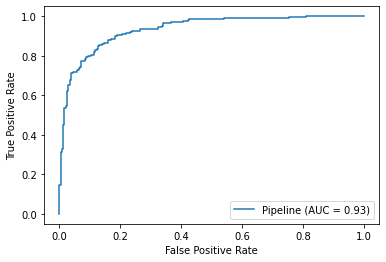

In [21]:
plot_roc_curve(grid_search.best_estimator_, X_test, y_test)

### Fit Model Using the Best Hyperparameters

In [22]:
# 1. Create a TfidfVectorizer oject using best hyperparameters
tfidf_vectorizer = TfidfVectorizer(min_df = best_params['vectorizer__min_df'], ngram_range = best_params['vectorizer__ngram_range'])

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Transform the training and test data
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 4. Create a LogisticRegression model object using the best hyperparameters, and fit the Logistic Regression model to the transformed training data
model_best = LogisticRegression(max_iter = best_params['model__max_iter'], C = best_params['model__C'])
model_best.fit(X_train_tfidf, y_train)

# 5. Make predictions on the transformed test data using the predict_proba() method and save the values of the second column
probability_predictions_best = model_best.predict_proba(X_test_tfidf)[:, 1]

# 6. Make predictions on the transformed test data using the predict() method
class_label_predictions_best = model_best.predict(X_test_tfidf)

# 7. Compute the Area Under the ROC curve (AUC) for the test data.
auc_score = roc_auc_score(y_test, probability_predictions_best)
print('AUC on the test data: {:.4f}'.format(auc_score))

AUC on the test data: 0.9346


### Confusion Matrix with Default Hyperparameters

In [23]:
# Create a confusion matrix to evaluate accuracy
c_m_default = confusion_matrix(y_test, class_label_predictions, labels = [True, False])
pd.DataFrame(c_m_default, columns = ['Predicted: Review is Positive', 'Predicted: Review is not Positive'], index = ['Actual: Review is Positive', 'Actual: Review is not Positive'])

,Predicted: Review is Positive,Predicted: Review is not Positive
Actual: Review is Positive,214,43
Actual: Review is not Positive,41,196


### Confusion Matrix with Best Hyperparameters

In [24]:
# Create a confusion matrix to evaluate accuracy
c_m_best = confusion_matrix(y_test, class_label_predictions_best, labels = [True, False])
pd.DataFrame(c_m_best, columns = ['Predicted: Review is Positive', 'Predicted: Review is not Positive'], index = ['Actual: Review is Positive', 'Actual: Review is not Positive'])

,Predicted: Review is Positive,Predicted: Review is not Positive
Actual: Review is Positive,221,36
Actual: Review is not Positive,35,202


## ROC Curve

In [25]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, probability_predictions)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, probability_predictions_best)

### ROC Curve for Default Hyperparameters

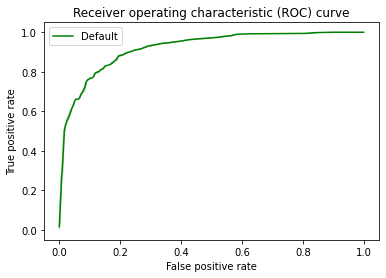

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x = fpr_default, y = tpr_default, label = 'Default', color = 'green')
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [27]:
auc_default = auc(fpr_default, tpr_default)
print("AUC score for default hyperparameters: ", auc_default)

AUC score for default hyperparameters:  0.9194700290597448


### ROC Curve for Best Hyperparameters

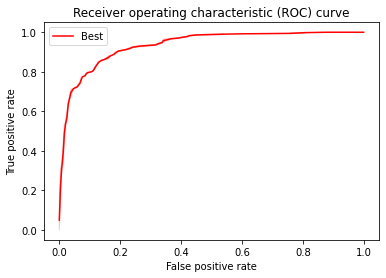

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x = fpr_best, y = tpr_best, label = 'Best', color = 'red')
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [29]:
auc_best = auc(fpr_best, tpr_best)
print("AUC score for best hyperparameters: ", auc_best)

AUC score for best hyperparameters:  0.9346237830205716


### Check to See if Model Predicts Properly Using 2 Examples

In [30]:
print('Review #1:\n')
print(X_test.to_numpy()[108])

print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions_best[108]))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[108]))

Review #1:

Many words - few practical tips! This book did not give much more (-valuable-) information than I already had found out by reading the manual delivered with my pocket computer. 
After reading the book I still had to search for web communities, where some of my questions could be answered. 
My expectations when buying the book were mainly focused on the need for practical hints concerning how to manage tasks, contacts and appointments. Unfortunately, in my view, these important and basic issues were treated too superficially.    


Prediction: Is this a good review? False

Actual: Is this a good review? False



In [31]:
print('Review #2:\n')
print(X_test.to_numpy()[342])

print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions_best[342]))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[342]))

Review #2:

This book teaches poetic technique clearly while remaining friendly and encouraging.  My second-semester poetry creative writing students use this book as a text together with Michael J. Bugeja's ART AND CRAFT OF POETRY


Prediction: Is this a good review? True

Actual: Is this a good review? True

